In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd /'content/gdrive/MyDrive/AI'

/content/gdrive/MyDrive/AI


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn 
from sklearn.metrics import classification_report

In [11]:
model = pd.read_excel("Model1_Output.xlsx", index_col = [0]) 

In [12]:
model.head()

,Actual_class,Predicted_class,Prob
S.No,,,
1,Chimpanzee,Chimpanzee,0.66
2,Cow,Cow,0.61
3,Dog,Dog,0.56
4,Dog,Dog,0.95
5,Cat,Cat,0.91


In [13]:
confusion_matrix = pd.crosstab(model.Predicted_class, model.Actual_class)

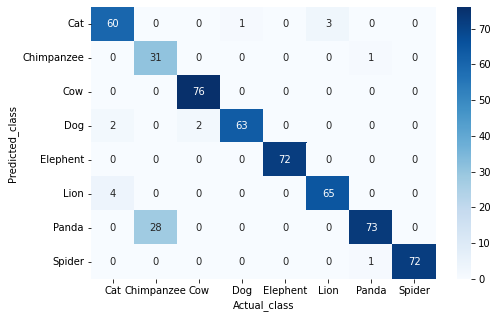

In [14]:
fig = plt.figure(figsize=(17,5))
ax = plt.subplot(121)
sn.heatmap(confusion_matrix, annot=True, cmap="Blues")

In [19]:
np.diag(confusion_matrix) #showing all the diagonal elements from the chart

array([60, 31, 76, 63, 72, 65, 73, 72])

In [20]:
np.diag(confusion_matrix).sum() #giving the sum of correct prediction

512

In [16]:
confusion_matrix.sum() #gives index wise sum

Actual_class
Cat           66
Chimpanzee    59
Cow           78
Dog           64
Elephent      72
Lion          68
Panda         75
Spider        72
dtype: int64

In [18]:
confusion_matrix.sum().sum() #gives sum of index wise sum

554

In [21]:
np.diag(confusion_matrix).sum()/confusion_matrix.sum().sum() #overall accuracy for the model

0.924187725631769

In [25]:
TP = confusion_matrix.iloc[0,0] # calculating TRUE POSITIVE
FP = confusion_matrix.iloc[0,:].sum() - TP # calculating FALSE POSITIVE
FN = confusion_matrix.iloc[:,0].sum() - TP # calculating FALSE NEGATIVE
TN = confusion_matrix.sum().sum() - TP - FP - FN # Calculating TRUE NEGATIVE

In [30]:
Accuracy = (TP+TN)/confusion_matrix.sum().sum() # calculating ACCURACY
Accuracy

0.9819494584837545

In [27]:
Precision = TP/(TP + FP) # calculating PRECISION
Precision

0.9375

In [28]:
Recall = TP/(TP + FN) # calculating RECALL
Recall

0.9090909090909091

In [29]:
F1_score = (2 * Precision * Recall)/(Precision + Recall) #calculating F1 SCORE
F1_score

0.923076923076923

In [31]:
# Solving for all Individuals 
for i in range(confusion_matrix.shape[0]):
  TP = confusion_matrix.iloc[i,i] # calculating TRUE POSITIVE
  FP = confusion_matrix.iloc[i,:].sum() - TP # calculating FALSE POSITIVE
  FN = confusion_matrix.iloc[:,i].sum() - TP # calculating FALSE NEGATIVE
  TN = confusion_matrix.sum().sum() - TP - FP - FN # Calculating TRUE NEGATIVE
  Accuracy = (TP+TN)/confusion_matrix.sum().sum() # calculating ACCURACY
  Precision = TP/(TP + FP) # calculating PRECISION
  Recall = TP/(TP + FN) # calculating RECALL
  F1_score = (2 * Precision * Recall)/(Precision + Recall) #calculating F1 SCORE
  print(confusion_matrix.index[i], Accuracy, Precision, Recall, F1_score)

Cat 0.9819494584837545 0.9375 0.9090909090909091 0.923076923076923
Chimpanzee 0.9476534296028881 0.96875 0.5254237288135594 0.6813186813186813
Cow 0.9963898916967509 1.0 0.9743589743589743 0.9870129870129869
Dog 0.9909747292418772 0.9402985074626866 0.984375 0.9618320610687023
Elephent 1.0 1.0 1.0 1.0
Lion 0.9873646209386282 0.9420289855072463 0.9558823529411765 0.9489051094890512
Panda 0.9458483754512635 0.7227722772277227 0.9733333333333334 0.8295454545454545
Spider 0.9981949458483754 0.9863013698630136 1.0 0.993103448275862


In [33]:
# Showing the data 

pd.DataFrame(classification_report(model.Actual_class, model.Predicted_class, output_dict=True)).T

,precision,recall,f1-score,support
Cat,0.937500,0.909091,0.923077,66.000000
Chimpanzee,0.968750,0.525424,0.681319,59.000000
Cow,1.000000,0.974359,0.987013,78.000000
Dog,0.940299,0.984375,0.961832,64.000000
Elephent,1.000000,1.000000,1.000000,72.000000
Lion,0.942029,0.955882,0.948905,68.000000
Panda,0.722772,0.973333,0.829545,75.000000
Spider,0.986301,1.000000,0.993103,72.000000
accuracy,0.924188,0.924188,0.924188,0.924188
macro avg,0.937206,0.915308,0.915599,554.000000
